In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from ProjPredictor import ProjPredictor
import os
from skimage import io
from skimage.transform import resize
import napari
%gui qt

In [ ]:
with open('dentate_projs', 'rb') as dprojs:
    d = pickle.load(dprojs)
    df = pd.DataFrame(d, index=[0])

In [ ]:
df = df.transpose()

In [ ]:
pd.DataFrame([1,2,3])

In [ ]:
sns.barplot(data=df.transpose())

In [ ]:
sns.barplot(data=tips, x='day', y='tip')

In [ ]:
pp = ProjPredictor(image_file='dentate_signal_aligned_100um_binarized.tif',
                   source_area='Dentate nucleus',
                   verbose=True)
pp.projections = 'dentate_proj_signal_aligned_100um.tif'
areas = ['Somatomotor areas',
         'Somatosensory areas',
         'Gustatory areas',
         'Visceral area',
         'Auditory areas',
         'Visual areas',
         'Anterior cingulate area',
         'Orbital area']
pp.save_proj_by_area(areas, 'dentate_projs')

In [ ]:
pp.projections = 'interposed_proj_signal_aligned_100um.tif'
pp.source_area = 'Interposed nucleus'
pp.save_proj_by_area(areas, 'interposed_projs')

In [ ]:
d_projs = pd.read_pickle('dentate_projs')
i_projs = pd.read_pickle('interposed_projs')

In [ ]:
df = pd.concat((d_projs, i_projs))

In [13]:
files = os.listdir('./proj_by_area')
# files = files[list(map(lambda s: s.endswith('proj_by_area'), files))]
projs = [pd.read_pickle('./proj_by_area/' + file) for file in files if 'filter-Thalamus' in file and 'norm' in file]
df = pd.concat(projs)

In [28]:
df[(df['Normalized by source'] == True) & (df['Normalized by target'] == True)]

,Source area,Target area,Projection strength,Normalized by source,Normalized by target,Filter area
0,Dentate nucleus,Somatomotor areas,1.092152e-05,True,True,Thalamus
1,Dentate nucleus,Visual areas,6.565735e-07,True,True,Thalamus
2,Dentate nucleus,Orbital area,2.319712e-05,True,True,Thalamus
3,Dentate nucleus,Prelimbic area,2.321448e-05,True,True,Thalamus
4,Dentate nucleus,Infralimbic area,1.462257e-05,True,True,Thalamus
...,...,...,...,...,...,...
0,Dentate nucleus,Somatomotor areas,1.835605e-05,True,True,Thalamus
1,Dentate nucleus,Visual areas,1.128382e-06,True,True,Thalamus
2,Dentate nucleus,Orbital area,3.054720e-05,True,True,Thalamus
3,Dentate nucleus,Prelimbic area,2.866980e-05,True,True,Thalamus


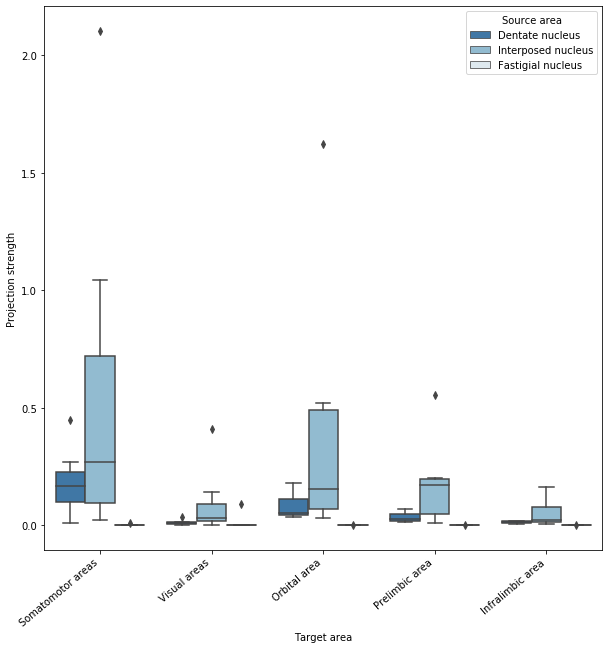

In [31]:
plt.figure(figsize=(10,10))
pal = sns.color_palette("RdBu_r")
filtered_data = df[(df['Normalized by source'] == True) & (df['Normalized by target'] == False)]
ax = sns.boxplot(data=filtered_data, x='Target area', y='Projection strength', 
                 hue='Source area', 
                 hue_order=['Dentate nucleus', 'Interposed nucleus', 'Fastigial nucleus'], 
                 palette=pal)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.get_figure().savefig('prelim_plot.pdf')

In [ ]:
1 in d.values()

In [ ]:
pd.DataFrame({'hi': [0,1], 'word': ['b','bye']})

In [ ]:
im = io.imread('datafornomi/DNfornomi/brain175/transformix_output/result_fixed.tif')

In [ ]:
imo = io.imread('dentate_signal_aligned_100um_binarized.tif')

In [ ]:
v = napari.view_image(np.flipud(resize(im, imo.shape)))
v.add_image(imo)

In [ ]:
imo.shape

In [ ]:
im.shape

In [10]:
im_path = 'datafornomi/DNfornomi/brain175/transformix_output_ilastik/result_fixed.tif'
im = io.imread(im_path)

In [11]:
real = np.copy(im)
v = napari.view_image(real)
midpt = int(im.shape[2] / 2)
im[:, :, midpt:] = 0
v.add_image(im)

<Image layer 'Image [1]' at 0x210267f50>

In [12]:
io.imsave('test_correct_side.tif', im.astype(np.float32))

In [8]:
pp = ProjPredictor(verbose=True, image_file='test_correct_side.tif')
pp.threshold(0.2)
pp.filter_by_name('Thalamus')
pp.vol_to_probs()
pp.save_projections('test_correct_side_proj.tiff')

Loading Voxel Model Cache...
Extracting voxel array, source mask, and target mask...
Loading image "test_correct_side.tif"...
Permuting, padding, and reflecting source image...
Filtering source image by selected structures...


ValueError: operands could not be broadcast together with shapes (398,275,380) (132,80,114) 

In [ ]:
io.imread('test_correct_side.tif').shape

In [ ]:
io.imread(im_path).shape